In [1]:
import numpy as np 
import pandas as pd 
import cv2

In [2]:
df = pd.read_csv('/kaggle/input/fer2013/fer2013.csv')

In [3]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
len(df.iloc[0]['pixels'].split())
# 48 x 48

2304

In [5]:
label_map = ['Anger', 'Neutral', 'Fear', 'Happy', 'Sad', 'Surprise']

In [6]:
import matplotlib.pyplot as plt

In [7]:
img = df.iloc[0]['pixels'].split()

In [8]:
img = [int(i) for i in img]

In [9]:
img = np.array(img)

In [10]:
img = img.reshape(48,48)

Text(0.5, 0, '0')

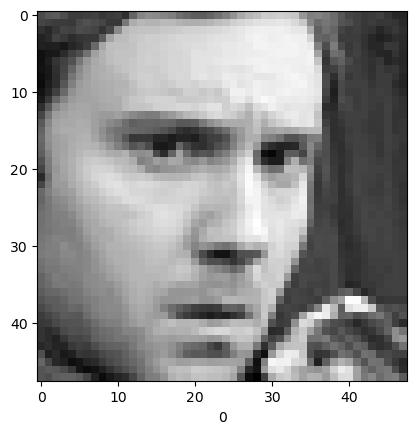

In [11]:
plt.imshow(img, cmap='gray')
plt.xlabel(df.iloc[0]['emotion'])

In [12]:
X = []
y = []

In [13]:
def getData(path):
    anger = 0
    fear = 0
    sad = 0
    happy = 0
    surprise = 0
    neutral = 0
    df = pd.read_csv(path)
    
    X = []
    y = []    
    
    for i in range(len(df)):
        if df.iloc[i]['emotion'] != 1:
            if df.iloc[i]['emotion'] == 0:
                if anger <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    anger += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 2:
                if fear <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    fear += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 3:
                if happy <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    happy += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 4:
                if sad <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    sad += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 5:
                if surprise <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    surprise += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 6:
                if neutral <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    neutral += 1
                else:
                    pass

            
            
    return X, y  
    

In [14]:
X, y = getData('/kaggle/input/fer2013/fer2013.csv')

In [15]:
np.unique(y, return_counts=True)

(array([0, 2, 3, 4, 5, 6]), array([4001, 4001, 4001, 4001, 4001, 4001]))

In [16]:
X = np.array(X)/255.0
y = np.array(y)

In [17]:
X.shape, y.shape

((24006, 2304), (24006,))

In [18]:
y_o = []
for i in y:
    if i != 6:
        y_o.append(i)
        
    else:
        y_o.append(1)

In [19]:
np.unique(y_o, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([4001, 4001, 4001, 4001, 4001, 4001]))

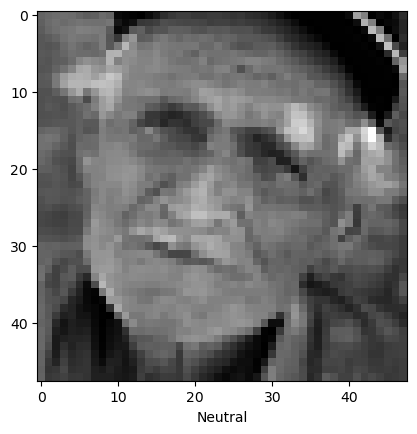

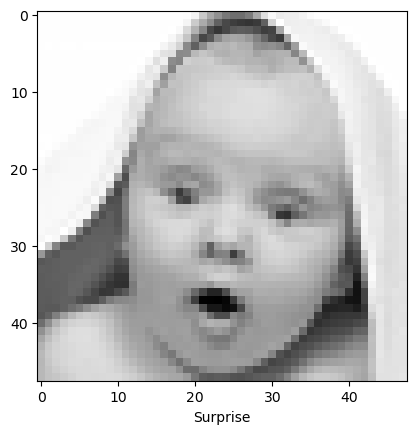

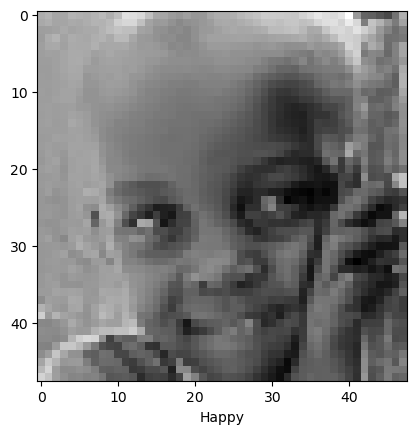

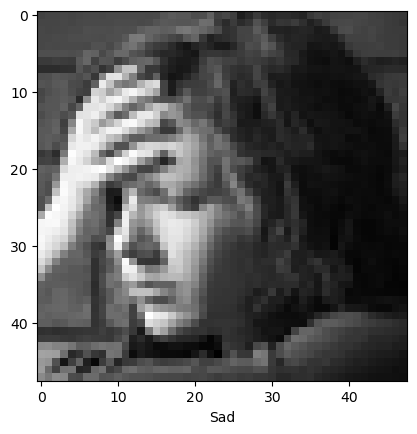

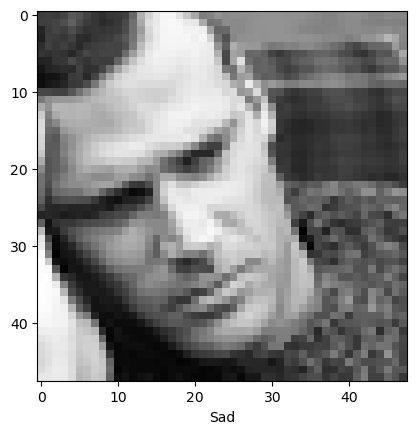

In [20]:
for i in range(5):
    r = np.random.randint((1), 24000, 1)[0]
    plt.figure()
    plt.imshow(X[r].reshape(48,48), cmap='gray')
    plt.xlabel(label_map[y_o[r]])

In [21]:
X = X.reshape(len(X), 48, 48, 1)

In [22]:
from keras.utils import to_categorical
y_new = to_categorical(y_o, num_classes=6)

In [23]:
len(y_o), y_new.shape

(24006, (24006, 6))

In [24]:
y_o[150], y_new[150]

(0, array([1., 0., 0., 0., 0., 0.], dtype=float32))

In [25]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten,BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *


In [26]:
model = Sequential()


input_shape = (48,48,1)


model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

## (15, 15) --->  30
model.add(Flatten())
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [27]:
model.fit(X, y_new, epochs=22, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/22
301/301 [==============================] - 24s 39ms/step - loss: 2.2091 - accuracy: 0.2400 - val_loss: 2.0235 - val_accuracy: 0.2524
Epoch 2/22
301/301 [==============================] - 11s 35ms/step - loss: 1.7223 - accuracy: 0.3216 - val_loss: 1.3956 - val_accuracy: 0.4229
Epoch 3/22
301/301 [==============================] - 11s 37ms/step - loss: 1.5467 - accuracy: 0.3939 - val_loss: 1.4278 - val_accuracy: 0.4571
Epoch 4/22
301/301 [==============================] - 11s 36ms/step - loss: 1.4329 - accuracy: 0.4431 - val_loss: 1.7546 - val_accuracy: 0.4338
Epoch 5/22
301/301 [==============================] - 11s 38ms/step - loss: 1.3423 - accuracy: 0.4785 - val_loss: 1.8314 - val_accuracy: 0.3188
Epoch 6/22
301/301 [==============================] - 11s 36ms/step - loss: 1.2683 - accuracy: 0.5117 - val_loss: 1.4833 - val_accuracy: 0.4475
Epoch 7/22
301/301 [==============================] - 11s 38ms/step - loss: 1.1864 - accuracy: 0.5400 - val_loss: 1.6094 - val_accuracy:

In [28]:
model.save('model.h5')

In [29]:
import cv2

In [30]:
test_img = cv2.imread('/kaggle/input/facees/smiling-face-mark-thomasscience-photo-library.jpg', 0)

In [31]:
test_img.shape

(900, 716)

In [32]:
test_img = cv2.resize(test_img, (48,48))
test_img.shape

(48, 48)

In [33]:
test_img = test_img.reshape(1,48,48,1)

In [34]:
model.predict(test_img)

1/1 [==============================] - 0s 311ms/step


array([[4.3173351e-16, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [35]:
# label_map = ['Anger', 'Neutral', 'Fear', 'Happy', 'Sad', 'Surprise']